In [12]:
import os
import tweepy as tw
import pandas as pd
import twitter
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
import nltk
nltk.download('words')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\raina\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
consumer_key="consumer_key"
consumer_secret="comsumer_secret"

access_token="access_token"
access_token_secret="access_token_secret"

In [3]:
auth = twitter.oauth.OAuth(access_token, access_token_secret,
                           consumer_key, consumer_secret)

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [8]:
new_search = "amazon india -filter:retweets"

tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",_id=23424848,
                          since="2000-01-01"
                          ).items(4000)

In [9]:
users_locs = [[tweet.user.screen_name, tweet.user.location,tweet.source,
               tweet.place,tweet.created_at,tweet.user.geo_enabled,
               tweet.user.friends_count,tweet.text,tweet.retweet_count,
               tweet.retweeted] for tweet in tweets]

In [10]:
tweet_text2 = pd.DataFrame(data=users_locs, 
                    columns=['user', "location","source","place","created_at",
                             "geo_enabled","friends_count",
                             "text","retweet_count","retweeted_status"])
tweet_text2

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,PanMacIndia,New Delhi,Buffer,None,2021-08-23 09:08:02,True,623,‘A thoughtful account of episodes in India's a...,0,False
1,DrPreetDeep,"Delhi, India",TradeDataBit,None,2021-08-23 09:00:39,True,904,approaching #Startups Frameworks Credit:inline...,0,False
2,ps5_india,Online,Twitter for Android,None,2021-08-23 08:55:41,False,8,PS5: https://t.co/DYmS78vrnD\n\nPS5 DE: https:...,0,False
3,ANI_multimedia,New Delhi,Twitter Web App,None,2021-08-23 08:53:27,False,0,Samsung Galaxy Tab S7 FE Wi-Fi variant to laun...,0,False
4,Jayankozhikote,India,Twitter Web App,None,2021-08-23 08:49:57,True,672,India is closing another door that would allow...,0,False
...,...,...,...,...,...,...,...,...,...,...
2715,seasonsway,"New Delhi, Delhi",Twitter Web App,None,2021-08-17 09:56:56,True,517,Shopify Dropshipping India\n👉https://t.co/u7Wt...,0,False
2716,seasonsway,"New Delhi, Delhi",Twitter Web App,None,2021-08-17 09:56:11,True,517,Amazon Drop shipping Business India\n👉https://...,0,False
2717,a_man_007,Bangalore,Twitter for Android,None,2021-08-17 09:51:44,False,132,"@AmazonHelp Hello Aman,\nI'm Mohsin from Amazo...",0,False
2718,TheDealsBot,India,Twitter Web App,None,2021-08-17 09:46:58,False,874,Cosmic Byte GS410 Headphones with Mic and for ...,1,False


In [41]:
data=pd.DataFrame(tweet_text2.text)

In [42]:
data.head()

,text
0,‘A thoughtful account of episodes in India's a...
1,approaching #Startups Frameworks Credit:inline...
2,PS5: https://t.co/DYmS78vrnD\n\nPS5 DE: https:...
3,Samsung Galaxy Tab S7 FE Wi-Fi variant to laun...
4,India is closing another door that would allow...


In [44]:
data.iloc[1,0]

'approaching #Startups Frameworks Credit:inline More thoughts @ https://t.co/Rg76ogqUxc &amp; https://t.co/MhEDLfjHod https://t.co/aPMOBvDAUe'

In [45]:
data.text=data.text.str.lower()

In [46]:
data.iloc[1,0]

'approaching #startups frameworks credit:inline more thoughts @ https://t.co/rg76ogquxc &amp; https://t.co/mhedlfjhod https://t.co/apmobvdaue'

In [47]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [48]:
data['text']=data['text'].apply(lambda x : remove_punctuation(x))

In [49]:
data.iloc[1,0]

'approaching startups frameworks creditinline more thoughts  httpstcorg76ogquxc amp httpstcomhedlfjhod httpstcoapmobvdaue'

In [50]:
data['text'] = data['text'].str.replace(r'http\S+|www.\S+','',case=False)

<ipython-input-50-1878e2d1e24e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace(r'http\S+|www.\S+','',case=False)


In [51]:
data.iloc[1,0]

'approaching startups frameworks creditinline more thoughts   amp  '

In [52]:
data['text'] = data['text'].str.replace('\d+','')

<ipython-input-52-916cd1bd69a5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('\d+','')


In [53]:
data.iloc[1,0]

'approaching startups frameworks creditinline more thoughts   amp  '

In [54]:
stop = stopwords.words('english')

In [55]:
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() 
                                                      if word not in (stop)]))

In [56]:
data.iloc[1,0]

'approaching startups frameworks creditinline thoughts amp'

In [57]:
words = set(nltk.corpus.words.words())

In [105]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('anazon|dont|cant|hi|hey|make|message|always|via|fe|first|voice', '', text)
    text =  re.sub('hello|team|touch|wont|towards|please|private','', text)
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) 
                     if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
   
    return text
round2 = lambda x: clean_text_round2(x)

In [106]:
data = pd.DataFrame(data.text.apply(round2))
data.iloc[1,0]

''

In [107]:
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [108]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]

In [109]:
data['text'] = data.text.apply(lambda x :' '.join(lemmatize_text(x)))
data.head()

,text
0,thoughtful account arduous journey energy cons...
1,
2,know add join
3,galaxy tab variant launch soon snapdragon android
4,another door would allow tech chance business ...


In [110]:
data['text'] = (data['text'].astype("str").str.rstrip())
data

,text
0,thoughtful account arduous journey energy cons...
1,
2,know add join
3,galaxy tab variant launch soon snapdragon android
4,another door would allow tech chance business ...
...,...
2715,
2716,drop business
2717,social media understand concern your
2718,cosmic one android blue


In [111]:
data.iloc[1,0]

''

In [112]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,2710,2711,2712,2713,2714,2715,2716,2717,2718,2719
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abort,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abrasive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,2711,2712,2713,2714,2715,2716,2717,2718,2719,freq
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
abort,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
abrasive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [114]:
tdm['freq'] = tdm.sum(axis=1)

In [115]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,2711,2712,2713,2714,2715,2716,2717,2718,2719,freq
0,abide,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
3,abort,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,abrasive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [116]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head(20)

C:\Users\raina\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-116-0d6b946742ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)


,Word,freq
1231,link,420
1014,help,342
345,celebrity,324
1646,price,276
561,deal,272
301,buy,210
219,best,208
371,check,182
895,galaxy,168
152,available,158


C:\Users\raina\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\raina\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


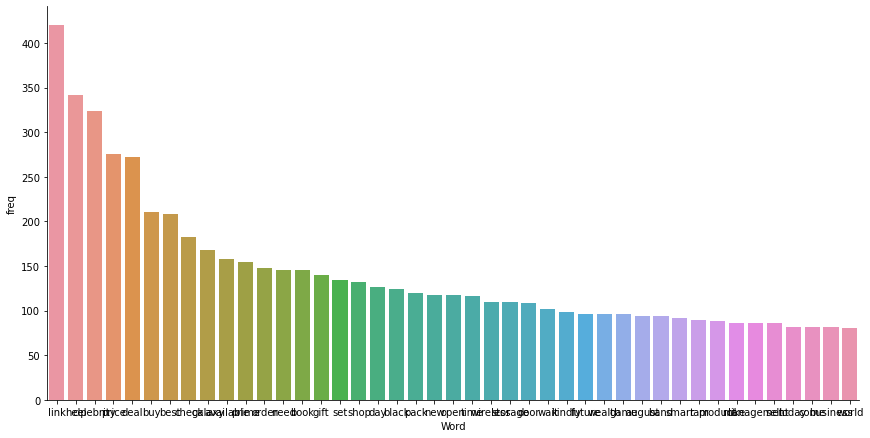

In [117]:
w = tdm1[tdm1['freq'] >=79] 
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [118]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 85806 words in the combination of all review.


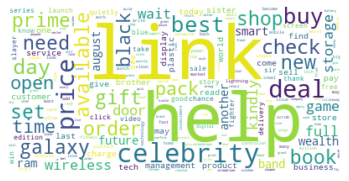

In [119]:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",collocations=False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()